#### MSE

In [2]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test, yhat)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

### model_selection

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
train_test_split(X, y, random_state=1,test_size=0.25)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)  # almost always use shuffle=True
fold_scores = []
for train, test in kf.split(X):
    model = LinearRegression()
    model.fit(X.values[train], y.values[train])
    fold_scores.append(model.score(X.values[test], y.values[test]))

np.mean(fold_scores)

In [ ]:
from sklearn.model_selection import cross_val_score
def cross_val(model, X, y, nfolds):
    
    mse = cross_val_score(model, X, y, 
                          scoring='neg_mean_squared_error',
                          cv=nfolds, n_jobs=-1) * -1
    r2  = cross_val_score(model, X, y, 
                          scoring='r2',
                          cv=nfolds, n_jobs=-1)
    mean_mse = mse.mean()
    mean_r2 = r2.mean()
    name = model.__class__.__name__
    print(f'{name}  Train CV | MSE: {mean_mse.round(2)} | R2: {mean_r2.round(3)}')
    return mean_mse,mean_r2 

In [ ]:
from sklearn.model_selection import GridSearchCV

### model

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
yhat = ridge.predict(X_test)
mse = mean_squared_error(y_test, yhat)

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
yhat = model1.predict(X_test)
R^2 on training data: model.score(X_train, y_train)

In [ ]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(3)
model.fit(X_train, y_train)

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1000)
model.fit(X, y)
beta0hat = model.intercept_[0]
beta1hat = model.coef_[0][0]
probabilities = model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print(accuracy_score(y_test, yhat))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# What is the accuracy score on the test data?
print("\n8. score:", rf.score(X_test, y_test))

In [10]:
# 9. Draw a confusion matrix for the results
y_predict = rf.predict(X_test)
print("\n9. confusion matrix:")
print(confusion_matrix(y_test, y_predict))


9. confusion matrix:
[[722   4]
 [ 34  74]]


In [11]:
# 10. What is the precision? Recall?
print("\n10. precision:", precision_score(y_test, y_predict))
print("    recall:", recall_score(y_test, y_predict))


10. precision: 0.9487179487179487
    recall: 0.6851851851851852


In [12]:
# 11. Build the RandomForestClassifier again setting the out of bag parameter to be true
rf = RandomForestClassifier(n_estimators=30, oob_score=True,  
                            n_jobs=-1,
                            random_state=1)
rf.fit(X_train, y_train)
print("\n11: accuracy score:", rf.score(X_test, y_test))
print("    out of bag score:", rf.oob_score_)
##   accuracy score: 0.953237410072
## out of bag score: 0.946778711485   (out-of-bag error is slightly worse)


11: accuracy score: 0.9520383693045563
    out of bag score: 0.9407763105242097


In [13]:
# 12. Use sklearn's model to get the feature importances
feature_importances = np.argsort(rf.feature_importances_)
print("\n12: top five:", list(df.columns[feature_importances[-1:-6:-1]]))
## top five: ['Day Mins', 'CustServ Calls', 'Day Charge', "Int'l Plan", 'Eve Mins']
## (will vary a little)


12: top five: ['Day Mins', 'Day Charge', 'CustServ Calls', "Int'l Plan", 'Eve Charge']


In [ ]:
rf = RandomForestClassifier(n_estimators=n1,max_features=n2)

#### Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)

abr = AdaBoostRegressor(DecisionTreeRegressor(),
                         learning_rate=0.1,
                         loss='linear',
                         n_estimators=100,
                         random_state=1)

#### Neural networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import SGD
model = Sequential()
n_hidden = 5
n_feats =X_train.shape[1]
model.add(Dense(units=n_hidden, input_dim=n_feats))
model.add(Activation('relu'))
model.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['mean_absolute_error'])

# or
denselayer = Dense(units=10,
                input_dim=n_feats,
                kernel_initializer='uniform',
                activation='sigmoid')
model.add(denselayer)
model.compile(loss='categorical_crossentropy', 
              optimizer="sgd", metrics=["accuracy"] )
from tensorflow.keras.utils import to_categorical
model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=5000, verbose=1,
              validation_split=0.1)
model.predict(X_test)[0]


### reprocessing

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model2 = Pipeline([
        ('pf', PolynomialFeatures(2)),
        ('lr', LinearRegression())
        ])
model2.fit(X_train, y_train)
yhat = model2.predict(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
model = Pipeline([('standardize', StandardScaler()),
                   ('regressor', Lasso())])

## Do some basic EDA

### Check for Missing Vales

As an initial check, we should make check our full data set for missing values.

In [10]:
diabetes_full.isnull().sum()

age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
disease_progression    0
dtype: int64

### Plots

Before we begin any EDA, we better hold out our final test set.  Otherwise we will be implicitly learning about our test set through EDA.

In [11]:
diabetes_train, diabetes_test = train_test_split(diabetes_full, test_size=1/3)
diabetes_train = diabetes_train.copy()
diabetes_test = diabetes_test.copy()

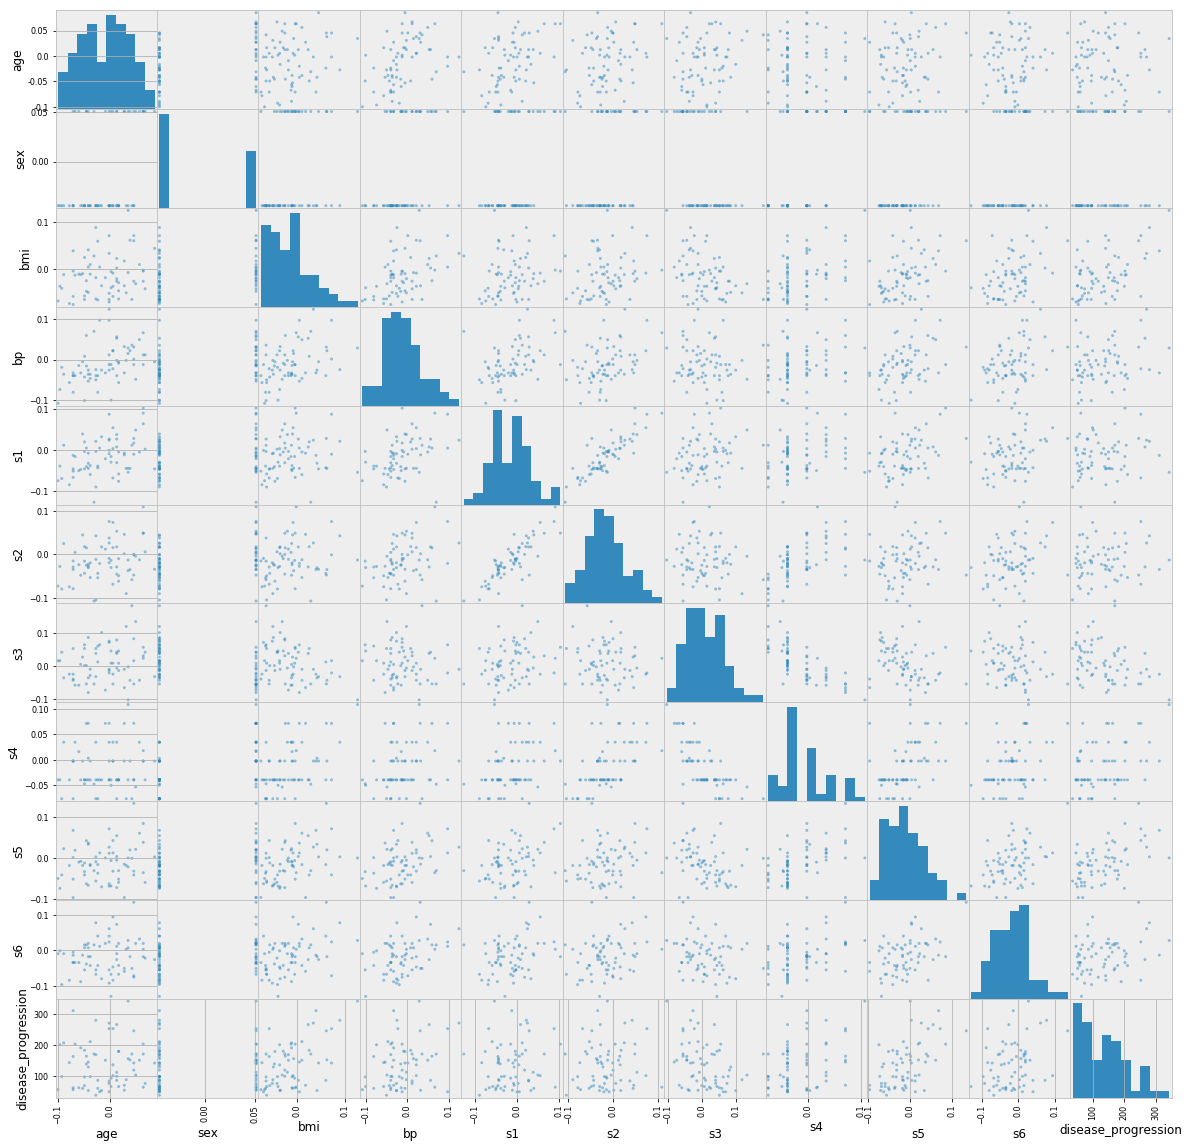

In [12]:
_ = pd.plotting.scatter_matrix(diabetes_train, figsize=(20, 20))

#### We should take a look at the distribution of the response, just to make sure that treating this as just a regression problem is completely sensible.

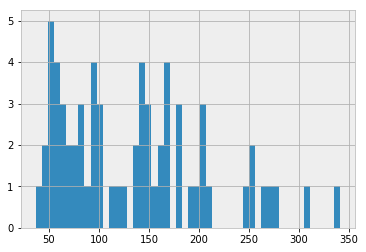

In [13]:
fig, ax = plt.subplots()

_ = ax.hist(diabetes_train['disease_progression'], bins=50)

#### confusion matrix  (pd.crosstab)

In [12]:
pd.crosstab(ytest, model.predict(Xtest), rownames=['actual'], colnames=['predicted'])

predicted,Fraud,Not
actual,,
Fraud,98,407
Not,103,1892


In [20]:
cb_matrix = pd.DataFrame([[15., 0.], [-5., 0.]], columns=["Fraud", "Not"], index=["Fraud", "Not"])
cb_matrix.index.name = 'actual'
cb_matrix.columns.name = 'predicted'

In [21]:
cb_matrix

predicted,Fraud,Not
actual,,
Fraud,$15,$0
Not,-$5,$0


Remember, the *actual* represents what the user would have done if we hadn't intervened. The *predicted* is what our model predicted the user would do; we use that to decide our action (investigate or not). Those two things together give us an outcome.

Our confusion matrix tells us how many users fit in each category, so to get the overall payout we just multiply things. For example, the total payout from the true positives is the number of true positives times the payout of each one.

In [22]:
confusion_matrix(model, X, 0.3) 

predicted,Fraud,Not
actual,,
Fraud,248,257
Not,298,1697


In [23]:
confusion_matrix(model, X, 0.3) * cb_matrix

predicted,Fraud,Not
actual,,
Fraud,"$3,720",$0
Not,"-$1,490",$0


And the total payout is the sum of that.

In [24]:
(confusion_matrix(model, X, 0.3) * cb_matrix).values.sum()

2230.0

#### Inspect a few of the sample images. (You may find the np.reshape and ax.imshow methods useful.) 

y_train:  5


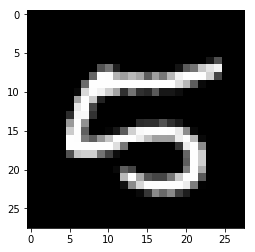

In [33]:
num = np.random.randint(0,60000)
x1 =np.array(X_train[num])
x1 =  x1.reshape(28,28)
plt.imshow(x1, cmap='gray')
print("y_train: ",y_train[num])

In [196]:
orig_data['last_trip_date'] = pd.to_datetime(orig_data['last_trip_date'])
orig_data['churn'] = orig_data['last_trip_date'].apply(lambda x: 1 if x < pd.to_datetime('2014-06-01') else 0)

In [256]:
orig_data['luxury_car_user'] = orig_data['luxury_car_user'].map({True: 'Luxury', False: 'No Luxury'})

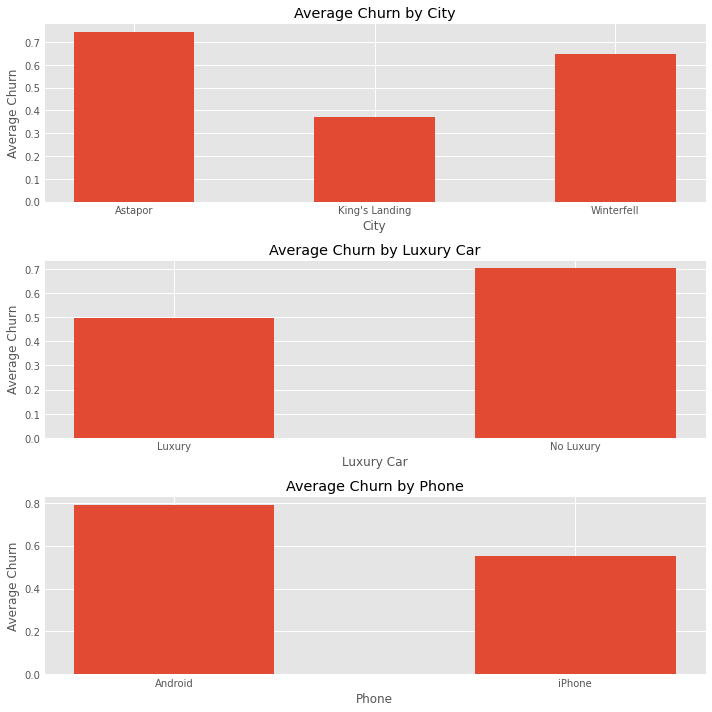

In [263]:
group_city = orig_data[['city', 'churn']].groupby('city').mean()
grouped_lux = orig_data.groupby('luxury_car_user').mean()
grouped_phone = orig_data.groupby('phone').mean()
groups = [group_city, grouped_lux, grouped_phone]
titles = ['City', 'Luxury Car', 'Phone']
fig, axs = plt.subplots(3, figsize = (10,10))
for i, ax in enumerate(axs):
    ax.bar(groups[i].index, groups[i]['churn'], width = 0.5 )
    ax.set_title(f'Average Churn by {titles[i]}', color = 'black')
    ax.set_ylabel('Average Churn')
    ax.set_xlabel(titles[i])
plt.tight_layout()
plt.savefig('images/average_churns')

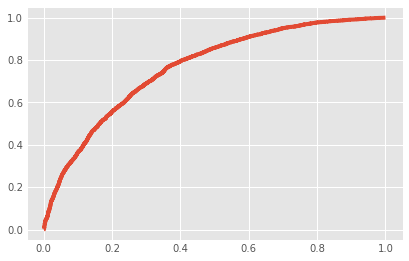

In [210]:
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr)